# DATA  CLEANING AND EDA  


## 1. IMPORT THE LIBRARIES 

In [1]:
# import all the libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

## 2. LOAD THE DATA 

In [2]:
data = pd.read_csv(r"C:\Users\Administrator\Downloads\Zomato-data-.csv")
data.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


### COLUMN DEFINITION 
- name: The name of the particular restaurant 
- online_order: The restaurant provides for online orders 
- book_table: Does the restaurant provide booking a table services 
- rate: The restaurant rates  on a scale of 5 
- votes:  The number of votes for a particular restaurant 
- cost: The cost per two persons 
- listed_in: The type of restaurant whether a buffet or a cafe or a dinning set 

## 3. EDA

In [20]:
## find the datatype of the restaurant 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [7]:
# The columns of the dataset 
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [9]:
# The shape of the data 
data.shape

(148, 7)

- The data has 148 rows and 7 columns 

## 4. DATA CLEANING 

In [11]:
# check for missing values 
data.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

- The data has no missing or null values 

## 5. UNIVARIATE ANALYSIS FOR NUMERIC VALUES 

In [13]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
numeric_data 

,votes,approx_cost(for two people)
0,775,800
1,787,800
2,918,800
3,88,300
4,166,600
...,...,...
143,0,100
144,0,150
145,771,450
146,98,800


In [15]:
# The numeric statistics of the Votes 
data['votes'].describe()

count     148.000000
mean      264.810811
std       653.676951
min         0.000000
25%         6.750000
50%        43.500000
75%       221.750000
max      4884.000000
Name: votes, dtype: float64

- The lowest value for votes is 0 votes while the highest value is 4884

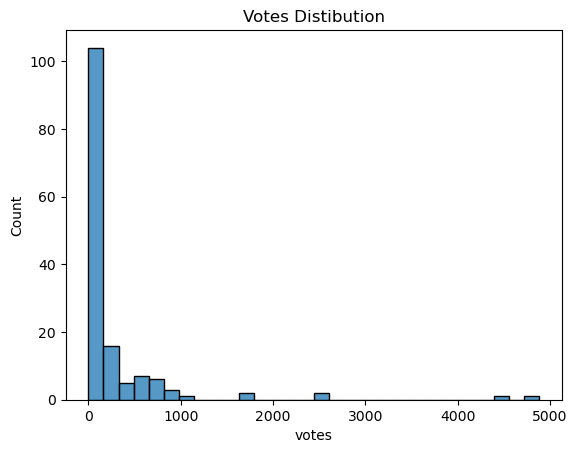

In [16]:
# Histogram for the votes 
sns.histplot(data['votes'], bins=30)
plt.title('Votes Distibution')
plt.show()

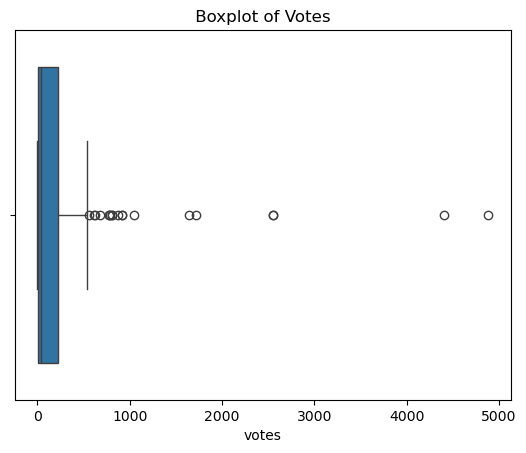

In [17]:
# Check for outliers in the the votes 
sns.boxplot(x=data['votes'])
plt.title(' Boxplot of Votes ')
plt.show()

- The votes have outliers especially around 3000 and 5000 votes this is a very likely occurence  because some restaurants are way more popular than other
a very likely observation in a hotel ratings website. 
- We may opt to deal with the outliers to create a better model and a more unified result or  keep the ouliers as they are just as important.

In [21]:
# numeric distributions for cost 
data['approx_cost(for two people)'].describe()

count    148.000000
mean     418.243243
std      223.085098
min      100.000000
25%      200.000000
50%      400.000000
75%      600.000000
max      950.000000
Name: approx_cost(for two people), dtype: float64

- The approximate cost for two  people in a restaurant is 100 dollars while the highest is 950 dollars 

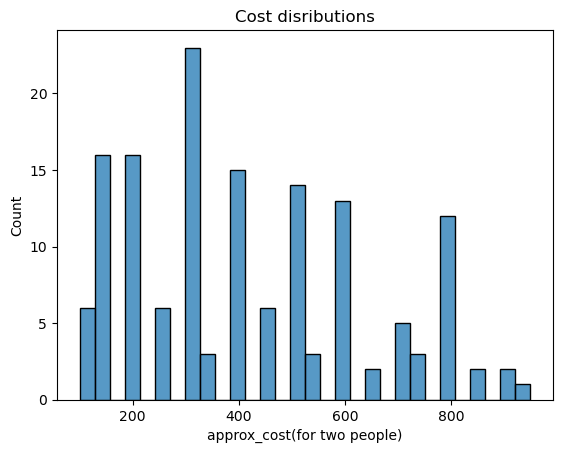

In [23]:
# Histogram for cost distibution 
sns.histplot(data['approx_cost(for two people)'], bins= 30)
plt.title('Cost disributions')
plt.show()

- The are no negative values in the cost distibutions so all data is skewed to the right 

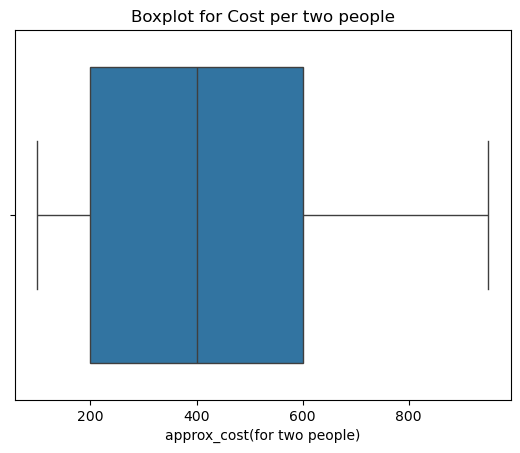

In [25]:
# check the outliers for cost ]
sns.boxplot(x=data['approx_cost(for two people)'])
plt.title('Boxplot for Cost per two people')
plt.show()

- It is noted that there are no outliers in the cost per two person

## 3. MULTIVARIATE ANALYSIS 

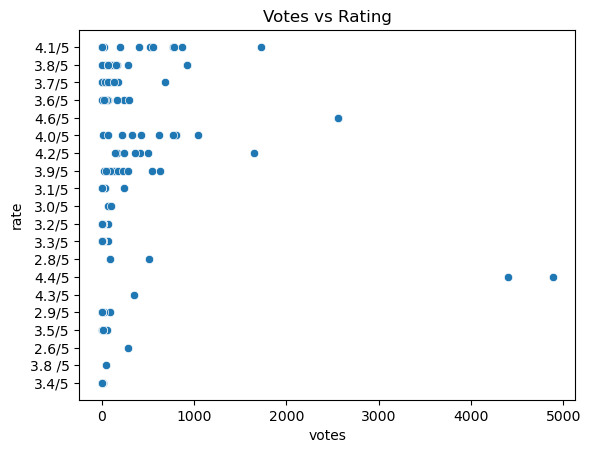

In [28]:
# Check the distibution per two values 
sns.scatterplot(x='votes', y='rate', data=data)
plt.title("Votes vs Rating")
plt.show()


- From the table higher rate isnt contributed by higher number of votes 

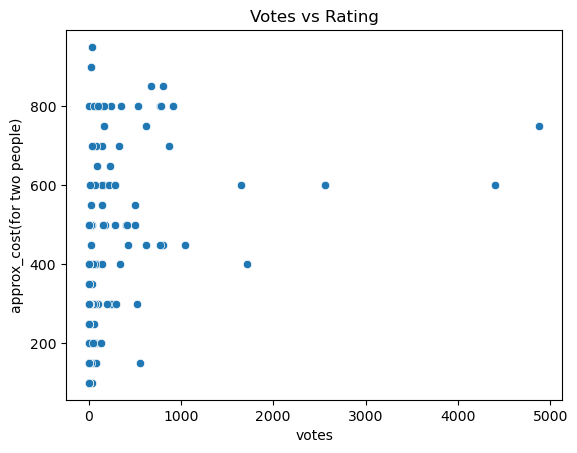

In [31]:
# check the correlation between votes and cost 
sns.scatterplot(x='votes', y='approx_cost(for two people)', data=data)
plt.title("Votes vs Rating")
plt.show()


- From the plot cost slightly increases

In [33]:
# check the corelation between cost and votes 
data[['approx_cost(for two people)', 'votes']].corr()


,approx_cost(for two people),votes
approx_cost(for two people),1.000000,0.324372
votes,0.324372,1.000000


In [ ]:
- The relation between cost and votes is a weak positive correlation This means the votes  increases slightly as the cost increases 